# Project 2

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
admissions = pd.read_csv('admissions.csv') #importing the dataframe

In [3]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


The length of the dataframe

In [4]:
len(admissions)

400

In [5]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


##Detecting how many null values there are

In [6]:
admissions.isnull().sum().sum()

5

There are 5 null counts

Creating a new dataframes for my original hypothesis

In [7]:
admissions=admissions.dropna()

In [8]:
admissions.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


As seen in the graph above, our count went down to 397 when first admit was at 100, gre & gpa were at 398 and prestige was at 399. Now the count is at 397 across the board is at 397

Creating new data frames that reflects what was proposed in Project 1

In [9]:
df=admissions[admissions.gpa >=3.5]

In [10]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
9,0,700.0,3.92,2.0
10,0,800.0,4.00,4.0


In [11]:
df1=df[df.prestige<=2]

In [12]:
len(df1)

86

In [13]:
df3=admissions[admissions.gpa >=3.5]

In [14]:
df4=df[df3.prestige>2]

In [15]:
df1.describe()

,admit,gre,gpa,prestige
count,86.000000,86.000000,86.000000,86.000000
mean,0.500000,642.325581,3.759070,1.639535
std,0.502933,97.373440,0.176733,0.482951
min,0.000000,400.000000,3.500000,1.000000
25%,0.000000,580.000000,3.590000,1.000000
50%,0.500000,640.000000,3.740000,2.000000
75%,1.000000,700.000000,3.940000,2.000000
max,1.000000,800.000000,4.000000,2.000000


In [16]:
df4.describe()

,admit,gre,gpa,prestige
count,74.000000,74.000000,74.000000,74.000000
mean,0.337838,622.972973,3.772838,3.283784
std,0.476201,108.976933,0.165335,0.453911
min,0.000000,380.000000,3.500000,3.000000
25%,0.000000,540.000000,3.630000,3.000000
50%,0.000000,630.000000,3.770000,3.000000
75%,1.000000,715.000000,3.940000,4.000000
max,1.000000,800.000000,4.000000,4.000000


Comparing the two cases, we are seeing that there are less students being accepted when they had a strong GPA but did not come from a presitgious school. Both of these data sets have different mean for admitted, 50% of the students who applied to the prestigious school were accepted.

In [18]:
df1.skew()

admit       0.000000
gre        -0.031622
gpa         0.105580
prestige   -0.591600
dtype: float64

In [19]:
df1.kurtosis()

admit      -2.048193
gre        -0.565878
gpa        -1.479020
prestige   -1.689866
dtype: float64

Covariance of the three datasets

In [21]:
admissions.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


In [42]:
df1.cov()

,admit,gre,gpa,prestige
admit,0.252941,1.176471,0.012000,-0.088235
gre,1.176471,9481.586867,3.637483,-7.151847
gpa,0.012000,3.637483,0.031234,-0.005986
prestige,-0.088235,-7.151847,-0.005986,0.233242


In [43]:
df4.cov()

,admit,gre,gpa,prestige
admit,0.226768,3.091448,-0.010424,0.012403
gre,3.091448,11875.971862,3.481859,-5.512773
gpa,-0.010424,3.481859,0.027336,-0.015063
prestige,0.012403,-5.512773,-0.015063,0.206035


In [22]:
adm_corr=admissions.corr()

In [23]:
adm_corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [24]:
lm = smf.ols(formula='admit~prestige+gpa',data=admissions).fit()

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     18.25
Date:                Mon, 02 Apr 2018   Prob (F-statistic):           2.63e-08
Time:                        22:04:37   Log-Likelihood:                -242.13
No. Observations:                 397   AIC:                             490.3
Df Residuals:                     394   BIC:                             502.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0610      0.214     -0.285      0.776      -0.482       0.360
prestige      -0.1151      0.024     -4.842      0.000      -0.162      -0.068
gpa            0.1959      0.059      3.311      0.001       0.080       0.312
==============================================================================
Omnibus:                      200.473   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.647
Skew:                           0.692   Prob(JB):                     2.24e-12
Kurtosis:                       1.848   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the smf.ols funciton, it has been determined that the addition of GPA and GRE have a weak linear correlation with admission

<IPython.core.display.Javascript object>


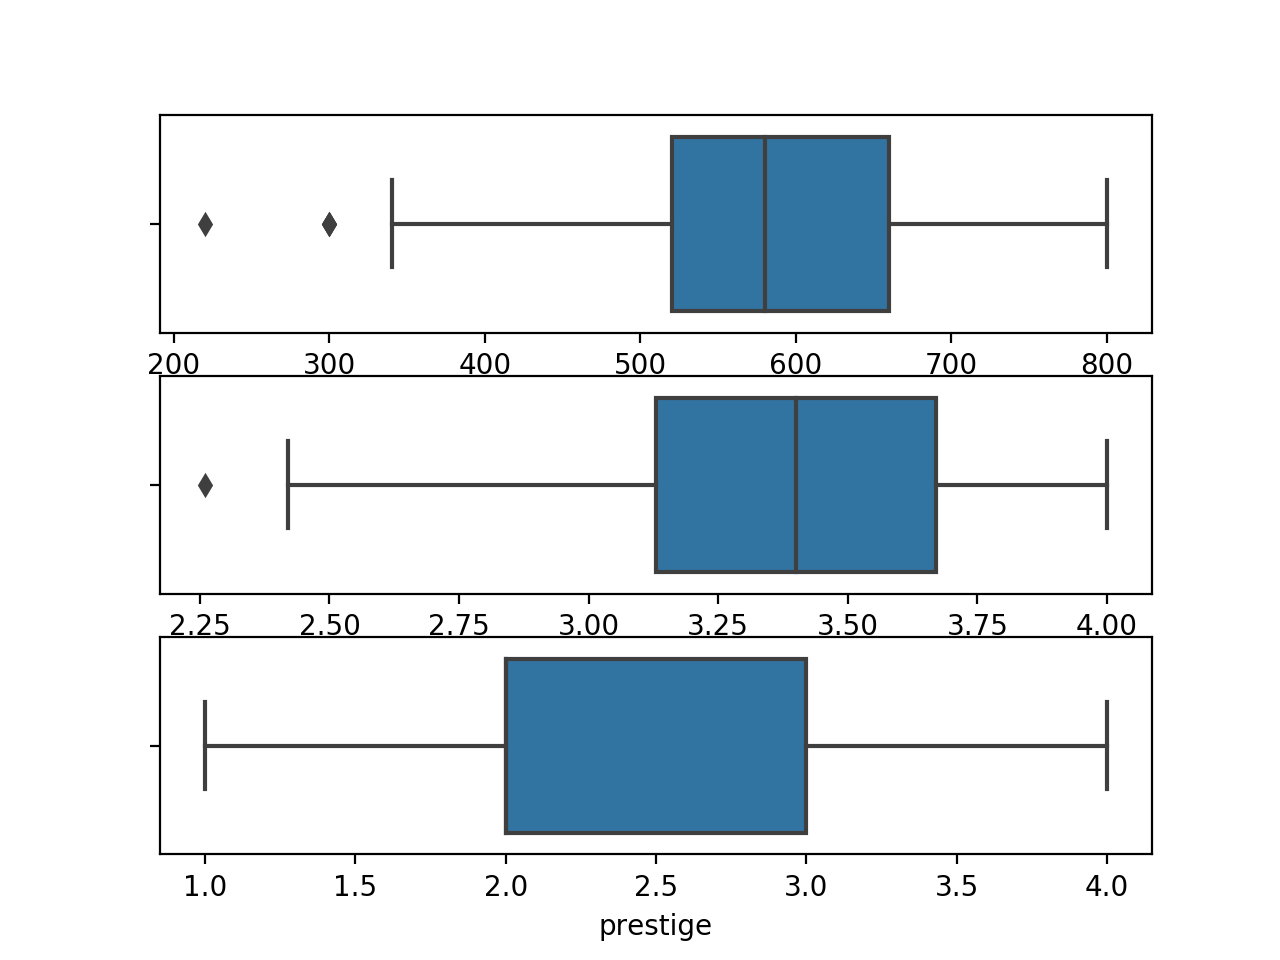

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [26]:
plt.figure()

plt.subplot(311)
sns.boxplot(admissions['gre'])

plt.subplot(312)
sns.boxplot(admissions['gpa'])

plt.subplot(313)
sns.boxplot(admissions['prestige'])

Description: GRE's median is slightly under 500 and has a couple outliers around 300 and slightly above 200
GPA: GPA's median is slightly 

<IPython.core.display.Javascript object>


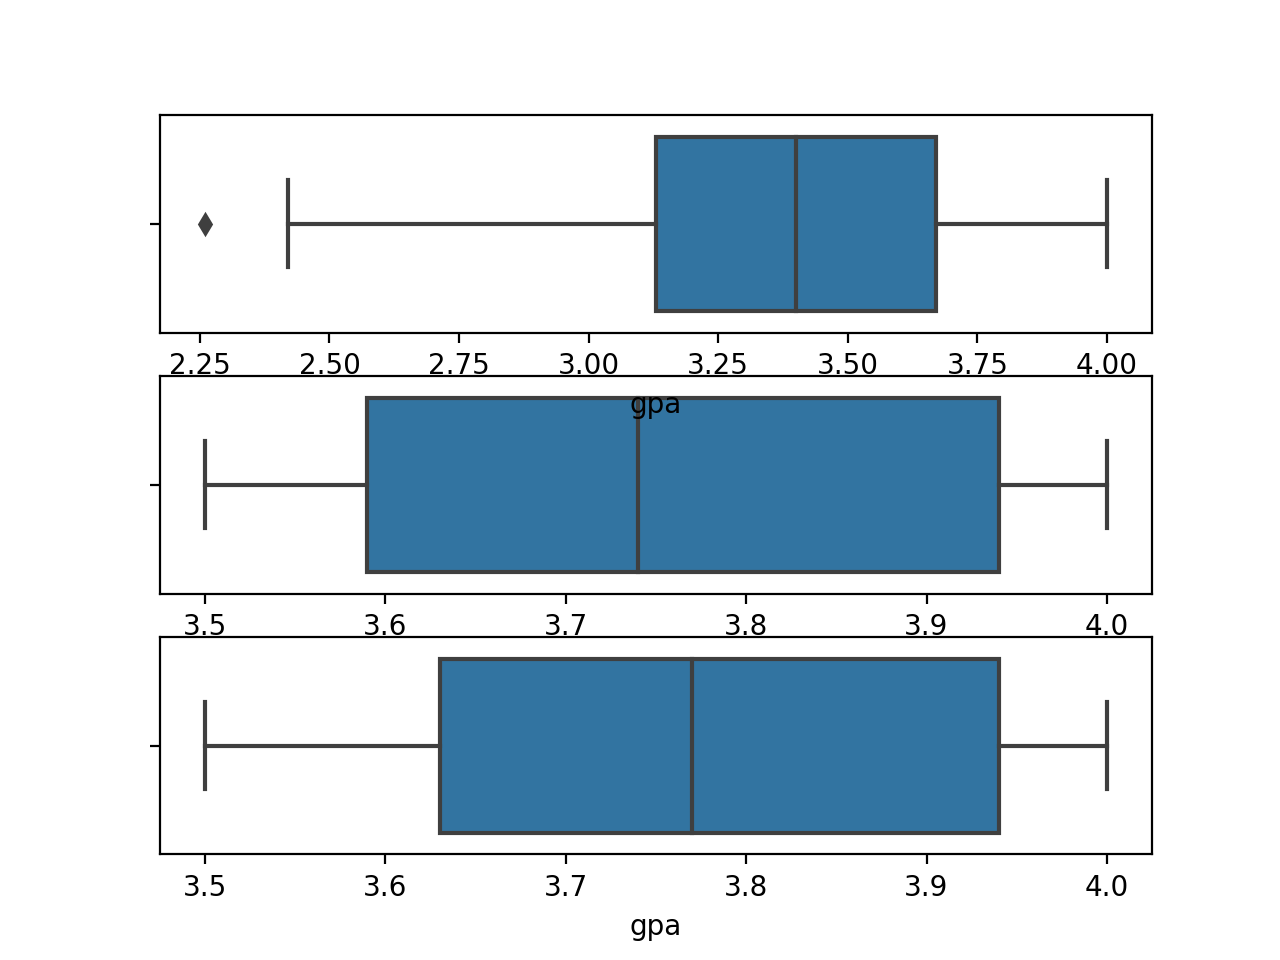

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [21]:
plt.figure()

plt.subplot(312)
sns.boxplot(df1['gpa'])

plt.subplot(313)
sns.boxplot(df4['gpa'])

plt.subplot(311)
sns.boxplot(admissions['gpa']);




In the original data set, the GPA is skewed slightly to the left centering around 3.4. It does contain one outlier 2.25. With the two other groups, both having a GPA higher than 3.5 they do differ in where there median lies. The less prestigious group has a slightly higher median of 3.77.

<IPython.core.display.Javascript object>


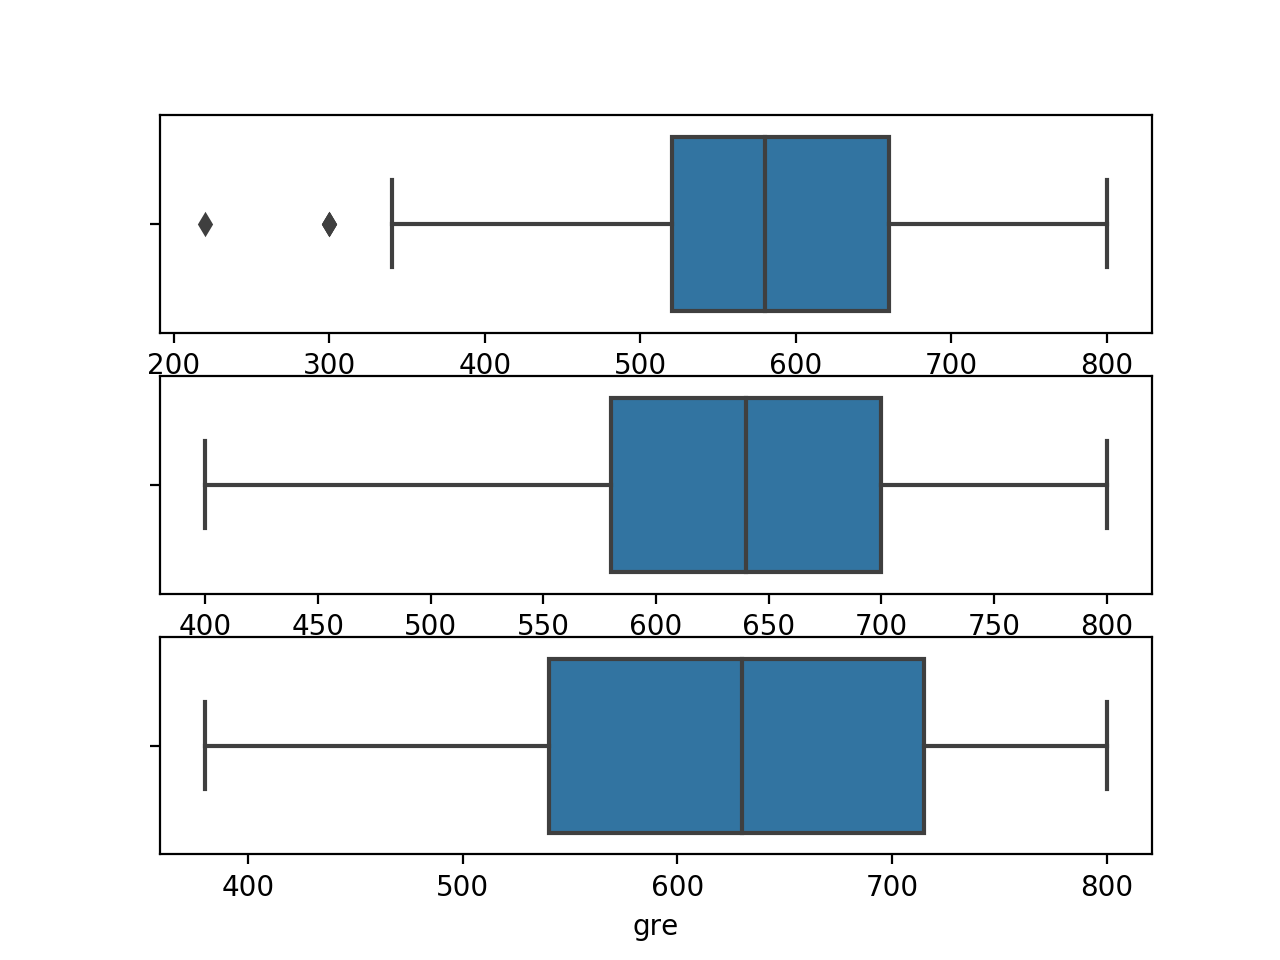

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [22]:
plt.figure()

plt.subplot(311)
sns.boxplot(admissions['gre'])

plt.subplot(312)
sns.boxplot(df1['gre'])

plt.subplot(313)
sns.boxplot(df4['gre'])

<IPython.core.display.Javascript object>


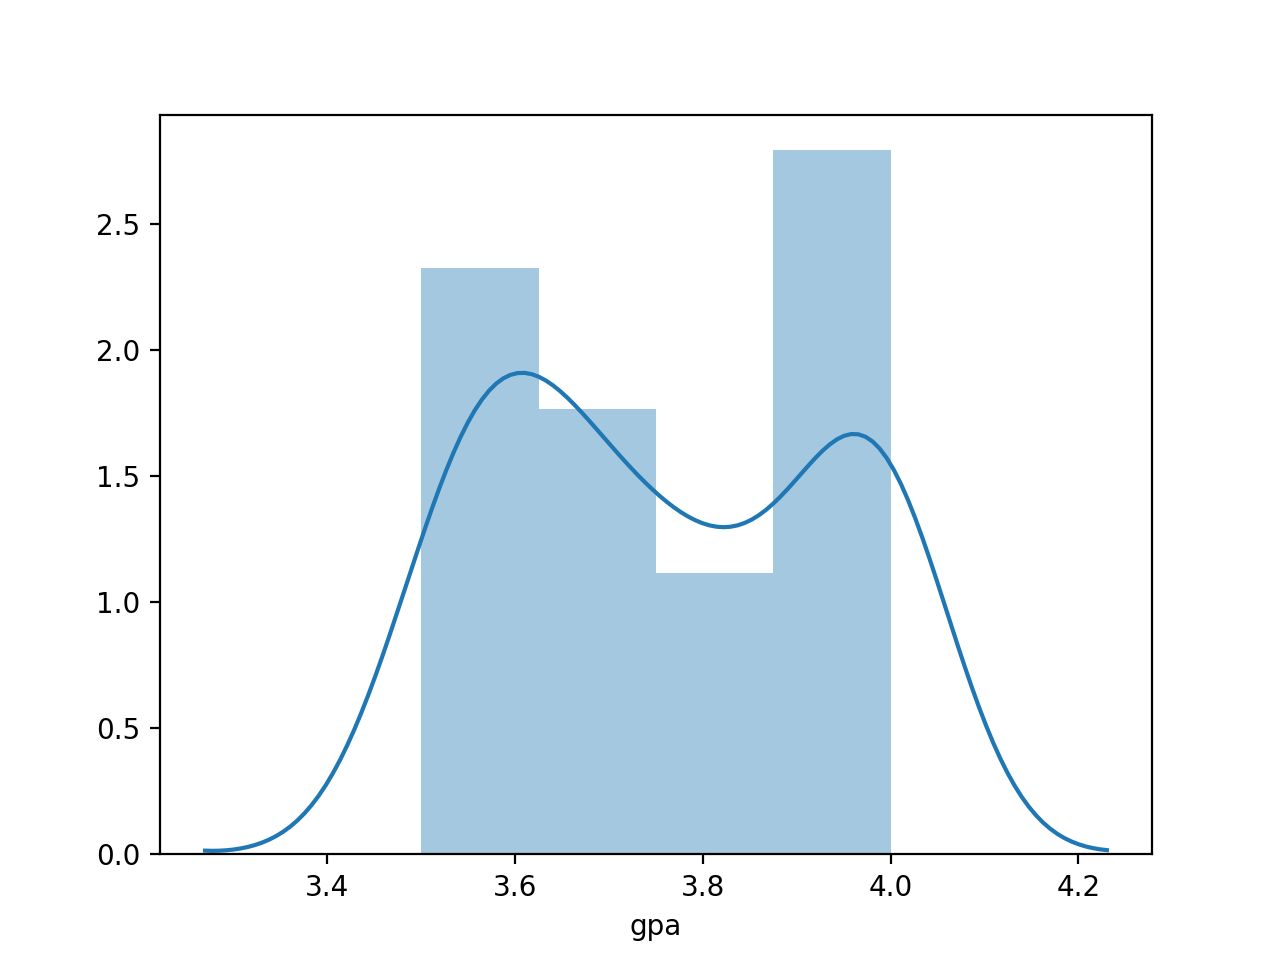

In [40]:
plt.figure()
sns.distplot(df1.gpa) #this distribution contains two humps, one roughly around 3.6 and the other around 3.9

The chart above has two high points, thus making me think that this data is not normal and will need a sort of transformation

<IPython.core.display.Javascript object>


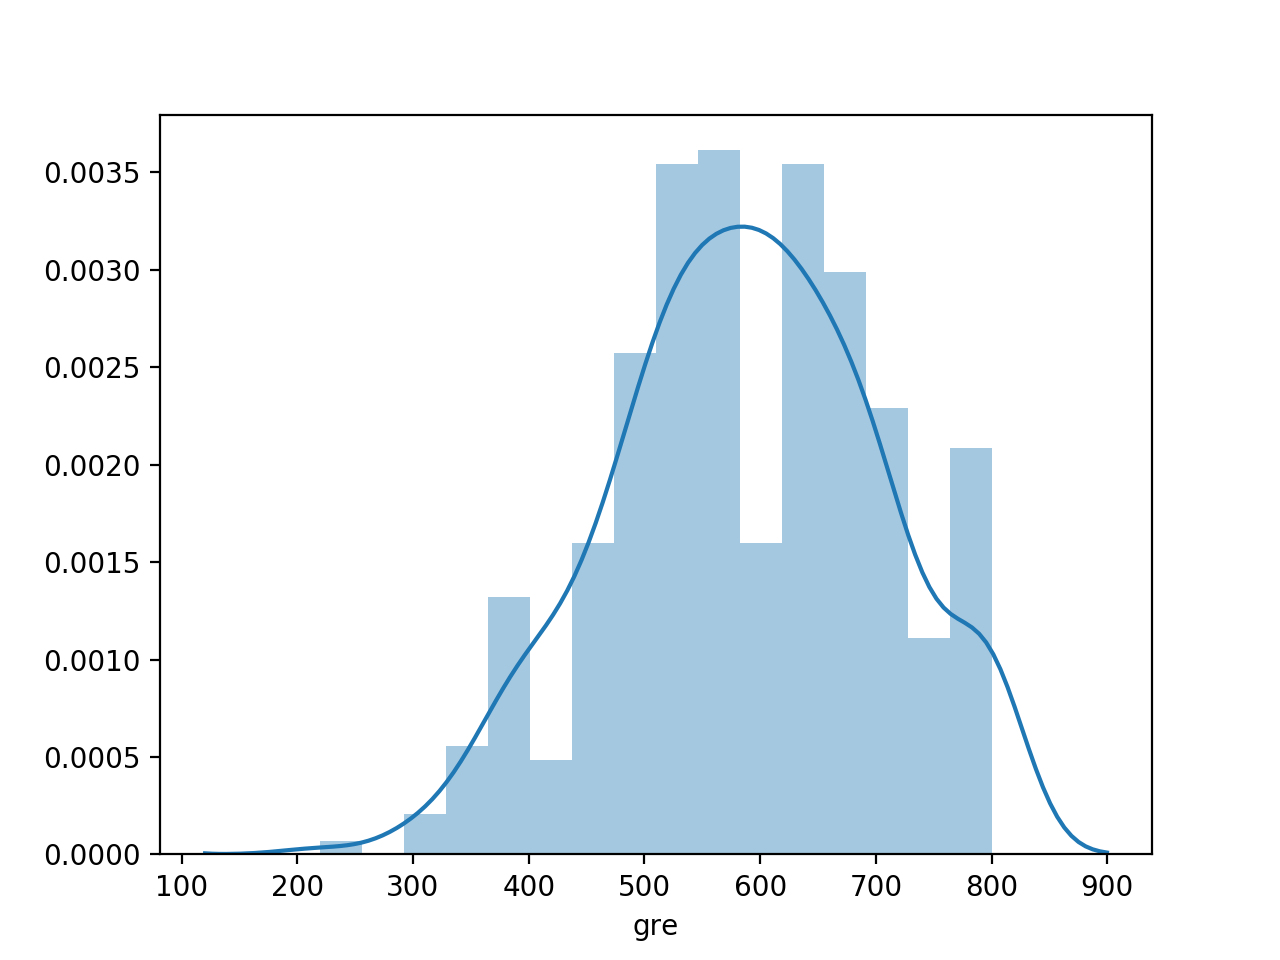

In [41]:
plt.figure()
sns.distplot(admissions.gre)

<IPython.core.display.Javascript object>


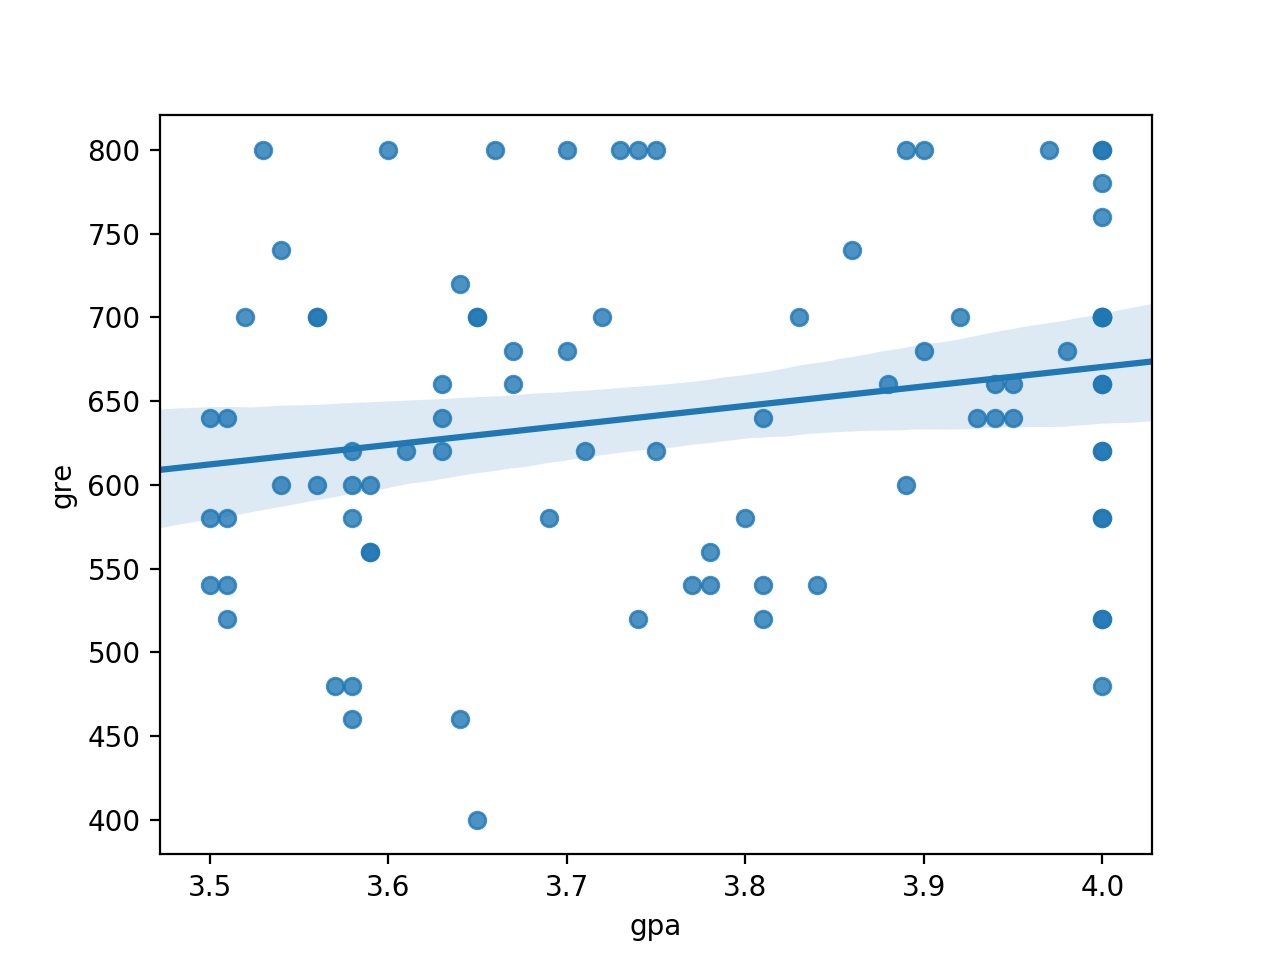

In [23]:
plt.figure()

sns.regplot(x=df1.gpa,y=df1.gre,data=df1)

<IPython.core.display.Javascript object>


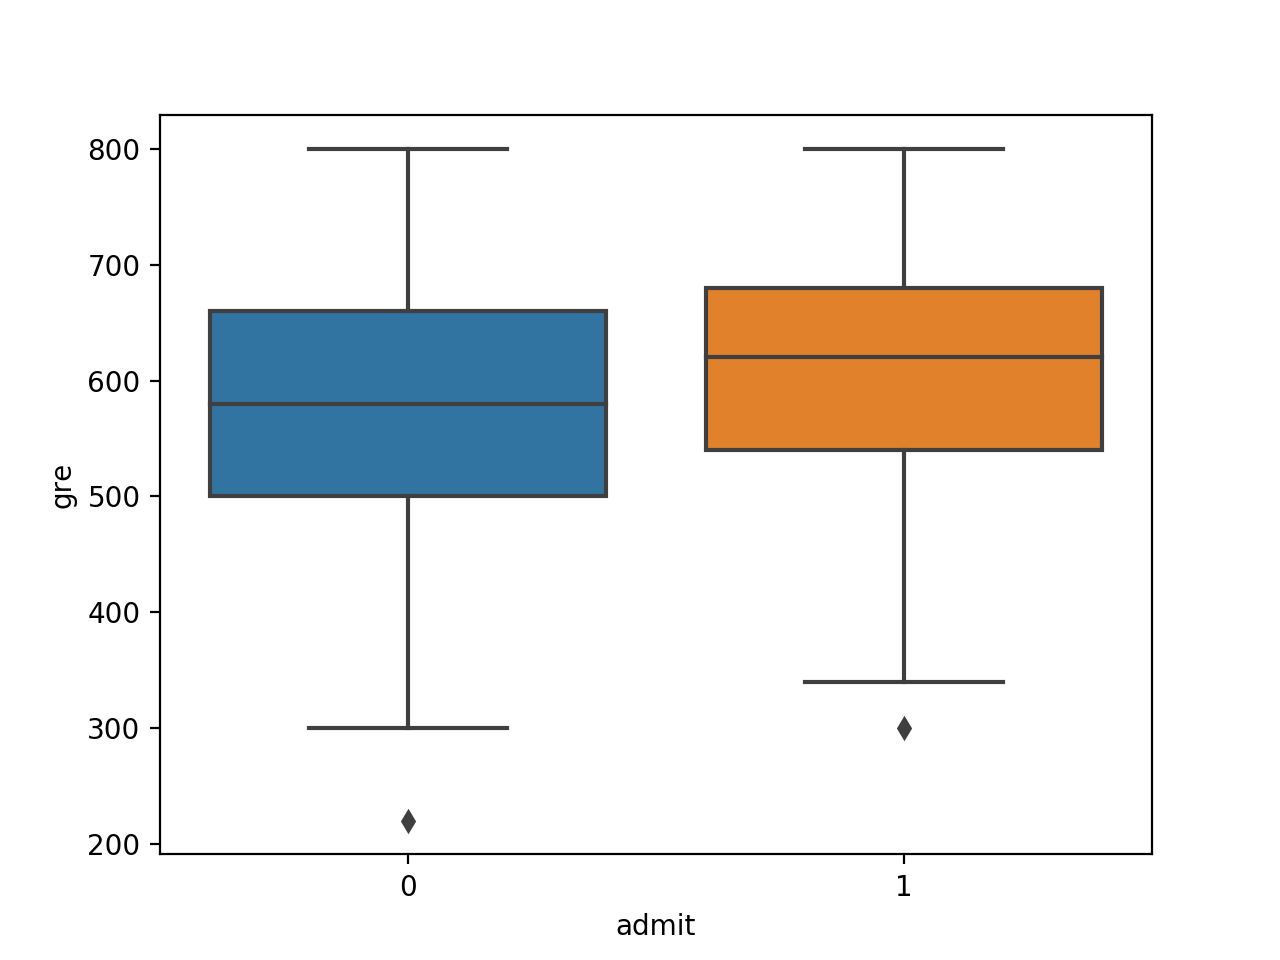

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [29]:
plt.figure()
sns.boxplot('admit', 'gre', data=admissions)

<IPython.core.display.Javascript object>


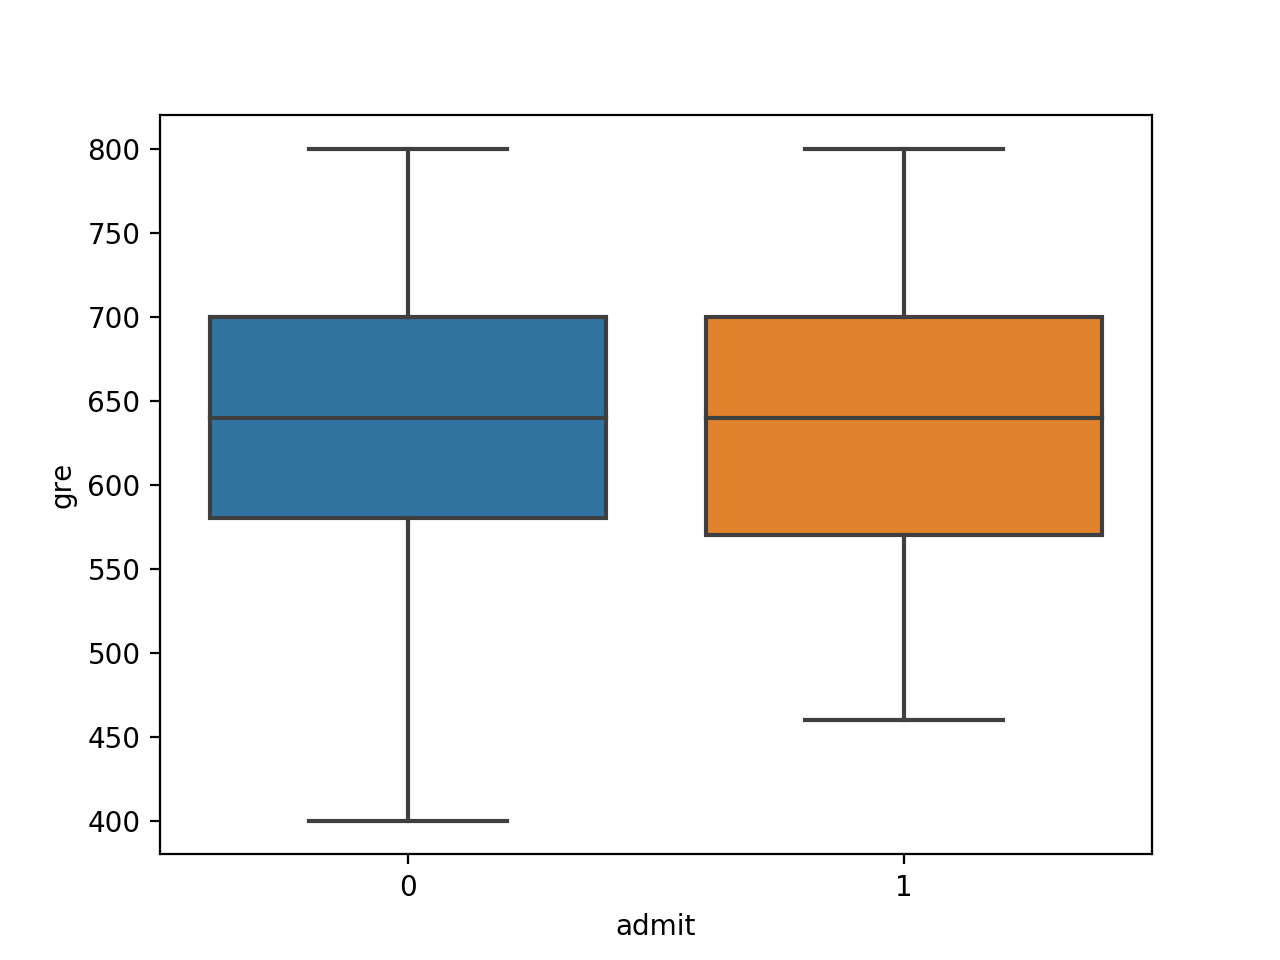

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [36]:
plt.figure()
sns.boxplot('admit', 'gre', data=df1)

Those who got accepted and those who didn't had a similar median for their GRE scores, roughly around 640. Those who didn't get accepted had a much larger range in GRE scores, 400 to 800

<IPython.core.display.Javascript object>


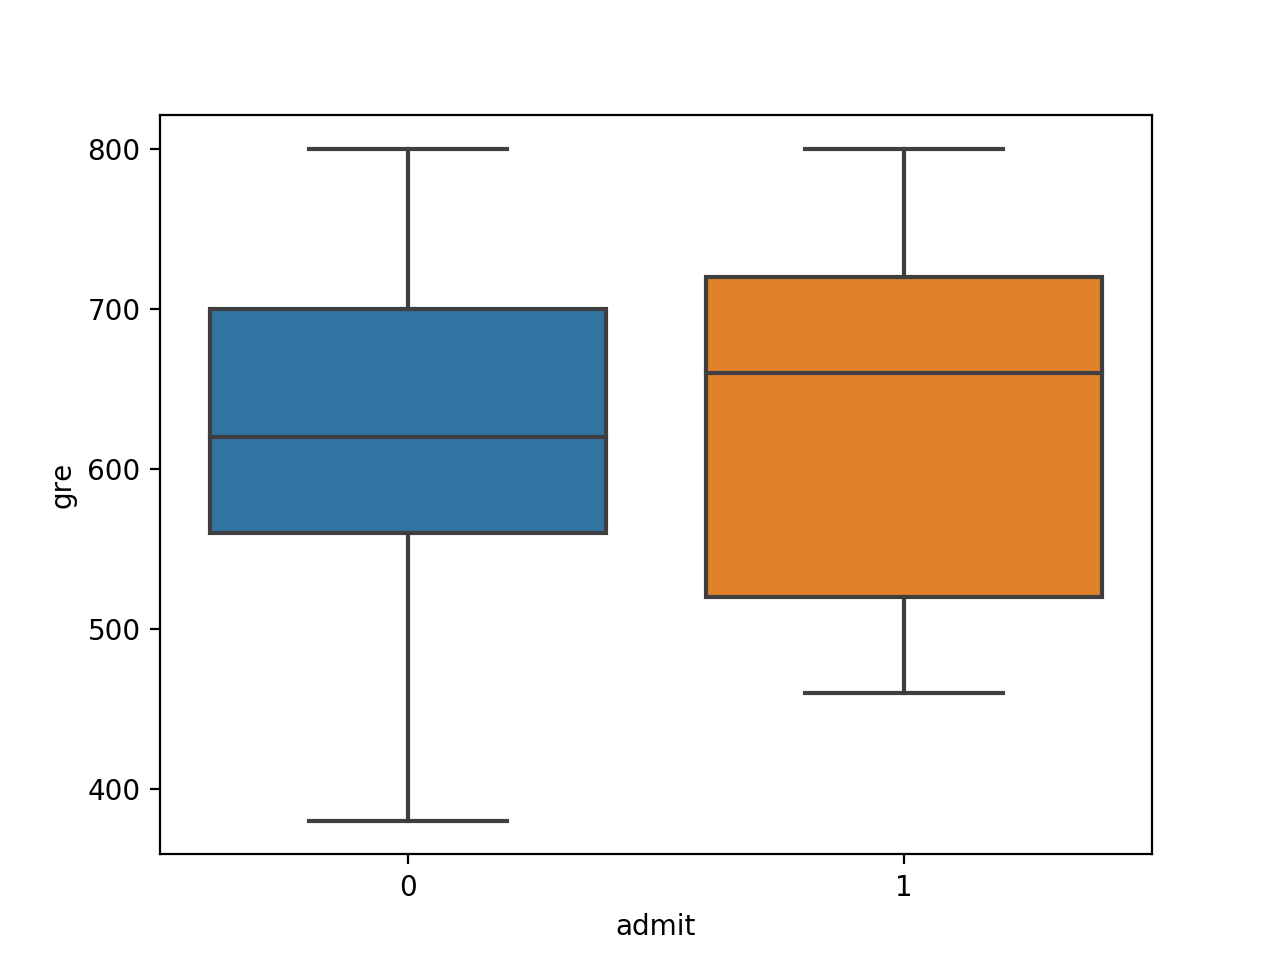

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [39]:
plt.figure()
sns.boxplot('admit', 'gre', data=df4)

<IPython.core.display.Javascript object>


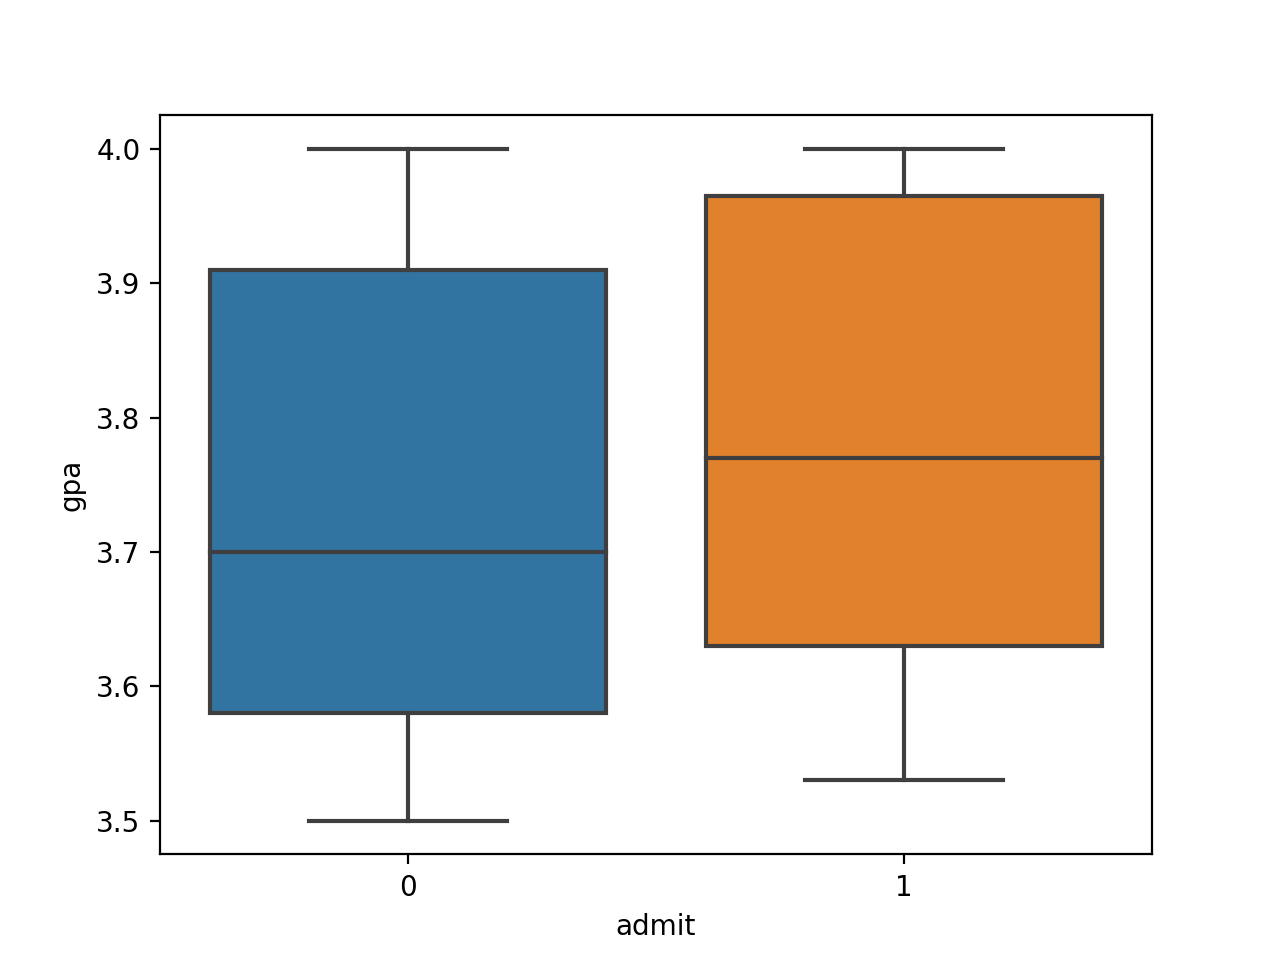

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [35]:
plt.figure()
sns.boxplot('admit', 'gpa', data=df1)

Those who got accepted had a higher GPA median, roughly 3.77.

<IPython.core.display.Javascript object>


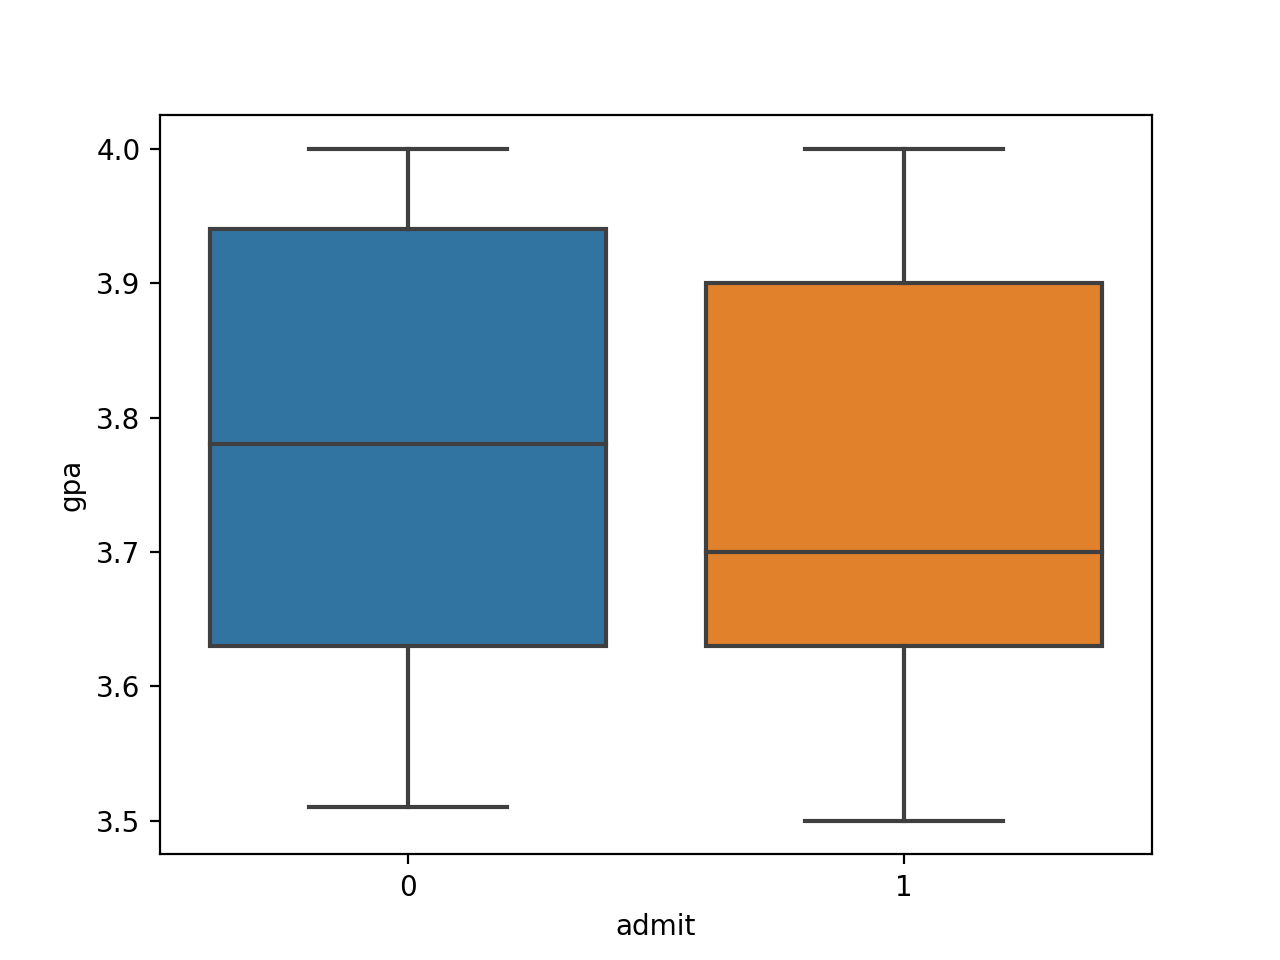

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [38]:
plt.figure()
sns.boxplot('admit', 'gpa', data=df4)

It is interesting to see that those who went to a less prestigious school and got accepted had a smaller median than those got rejected. The df4.gre for those who got admitted appears to be skewed right as well.

<IPython.core.display.Javascript object>


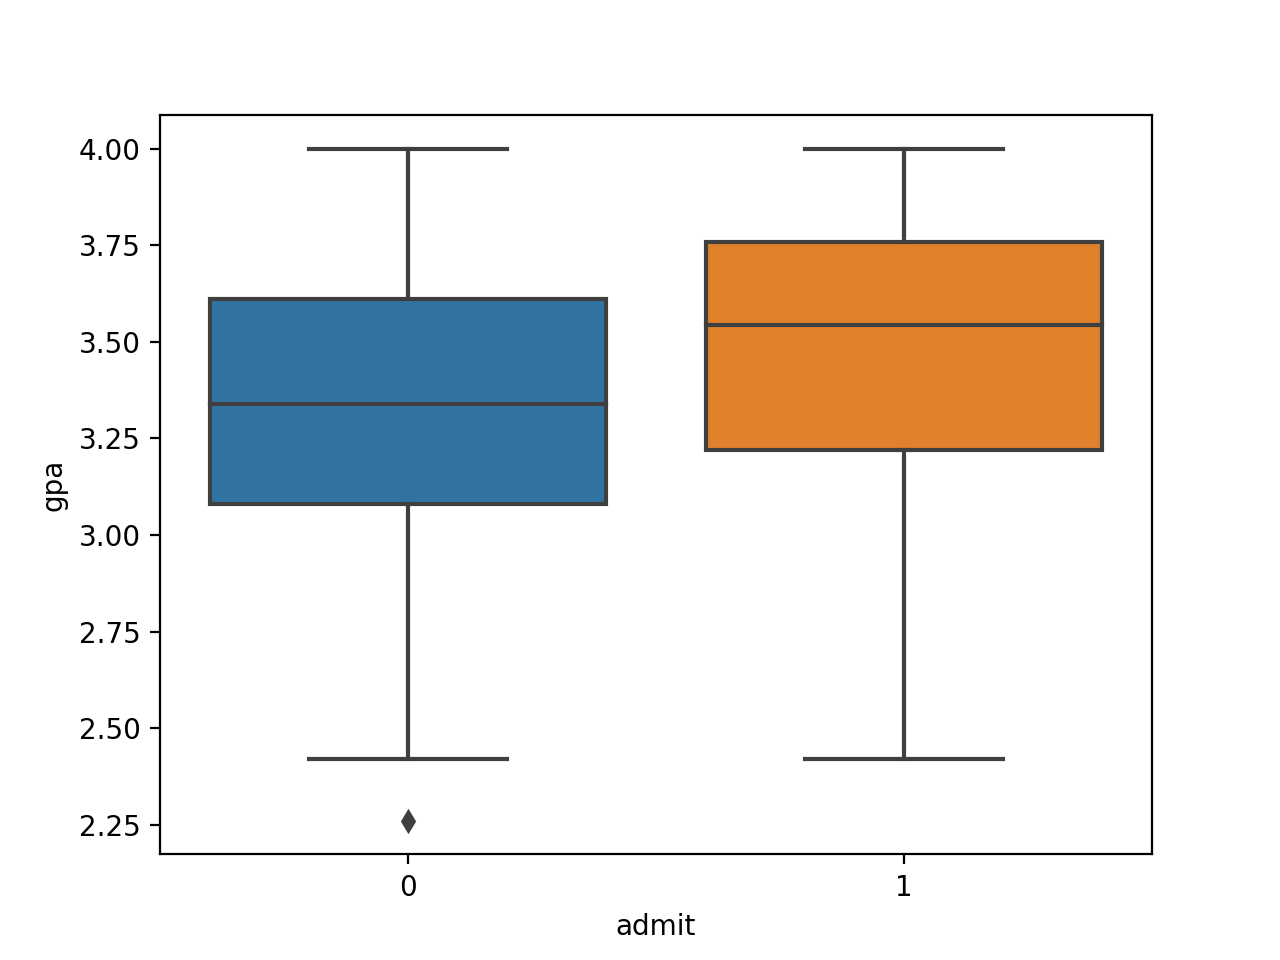

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [30]:
plt.figure()
sns.boxplot('admit', 'gpa', data=admissions)

The students who were admitted GPA is slightly skewed left.

In [31]:
admissions['gre'].std()

115.71778737531905

In [32]:
admissions['gpa'].std()

0.38020829214908614

There is a higher standard deviation for GRE due to the larger range

## Limitations & Assumptions

We are assuming that this is a normal distribution and all within the same Time Frame. We are excluding any other factors such as recommendations and extra cirricular activities. Since we are excluding those factors we are only examining how GPA, GRE, Prestige of their school affects their acceptance into the UCLA program.

There is also some values that are missing, these values could have had a big or small impact on the admissions data.

It would be interesting to see this dataset over a series of time to see how performance 